In [1]:
# tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import load_model
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score

In [3]:
import tensorflow as tf

# generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'E:\\Adversarial_Generation\\casisa_facenet\\divided_dataset\\train_dataset',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(160,160)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'E:\\Adversarial_Generation\\casisa_facenet\\divided_dataset\\test_dataset',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(160,160)
)

Found 388297 files belonging to 10572 classes.
Found 102326 files belonging to 10572 classes.


In [4]:
train_ds_1 = train_ds
validation_ds_1 = validation_ds

In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

(160, 160, 3)


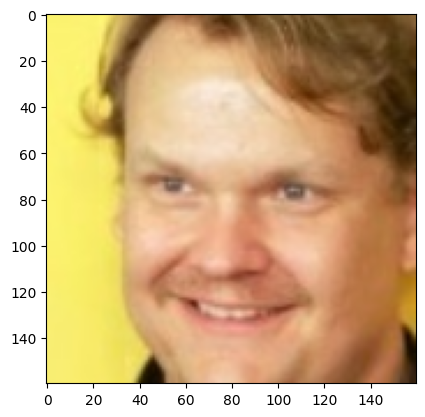

In [6]:
import matplotlib.pyplot as plt
for i, j in train_ds.take(1):
    print(i[1].shape)
    image = i[1]
    plt.imshow(image)
    plt.show()

In [7]:
model_for_simba = tf.keras.models.load_model("final_model")

In [8]:
hoooolaa = model_for_simba.output_shape[-1]
hoooolaa

10572

1/1 [==============================] - 4s 4s/step


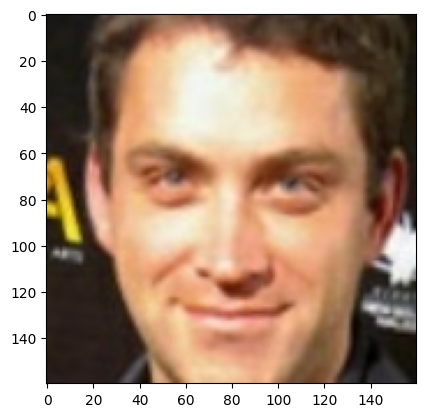

True Label: 8291
Predicted Label: 8291, Confidence: 0.9860575795173645


In [9]:
for images, labels in validation_ds.take(1):
    input_image = images[0]
    true_label = labels[0]
    true_label_index = np.argmax(true_label)
    prediction = model_for_simba.predict(np.expand_dims(input_image, axis=0))
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)
    plt.imshow(input_image)
    plt.show()
    print(f"True Label: {true_label_index}")
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}")

In [10]:
# class_index = validation_ds_1.class_names.index('000011')
# class_index

In [11]:
label_list = [18,23,41,5177,8715]
list_of_list=[]
list_18 =[]
list_23 =[]
list_41 =[]
list_5177 = []
list_8715 = []
for images, labels in validation_ds:
    # Filter images that belong to the specified class
    for i in range(len(labels)):
        label_index = tf.argmax(labels[i]).numpy()
        if label_index == 18:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_18.append(images[i].numpy())
        elif label_index == 23:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_23.append(images[i].numpy())
        elif label_index == 41:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_41.append(images[i].numpy())                

        elif label_index == 5177:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_5177.append(images[i].numpy())

        elif label_index == 8715:
            print("V")
            input_image = np.expand_dims(images[i], axis=0)
            prediction = model_for_simba.predict(input_image)
            print("H")
            confidence = np.max(prediction)
            if confidence*100 >= 90:
                list_8715.append(images[i].numpy())

V
1/1 [==============================] - 0s 31ms/step
H
V
1/1 [==============================] - 0s 40ms/step
H
V
1/1 [==============================] - 0s 29ms/step
H
V
1/1 [==============================] - 0s 31ms/step
H
V
1/1 [==============================] - 0s 27ms/step
H
V
1/1 [==============================] - 0s 32ms/step
H
V
1/1 [==============================] - 0s 30ms/step
H
V
1/1 [==============================] - 0s 28ms/step
H
V
1/1 [==============================] - 0s 24ms/step
H
V
1/1 [==============================] - 0s 30ms/step
H
V
1/1 [==============================] - 0s 20ms/step
H
V
1/1 [==============================] - 0s 30ms/step
H
V
1/1 [==============================] - 0s 31ms/step
H
V
1/1 [==============================] - 0s 27ms/step
H
V
1/1 [==============================] - 0s 30ms/step
H
V
1/1 [==============================] - 0s 26ms/step
H
V
1/1 [==============================] - 0s 23ms/step
H
V
1/1 [==============================] - 0s 28ms

In [12]:
print(len(list_18))
print(len(list_23))
print(len(list_41))
print(len(list_5177))
print(len(list_8715))

67
86
82
34
19


In [13]:
type(list_18[0])

numpy.ndarray

In [14]:
class_18 = np.array(list_18)
class_23 = np.array(list_23)
class_41 = np.array(list_41)
class_5177 = np.array(list_5177)
class_8715 = np.array(list_8715)

In [28]:
target_class = 38
# Create the target vector (one-hot encoded)
num_samples = class_8715.shape[0]  # Number of samples in class_18
num_classes = 10572  # Total number of classes in your model
y_target = np.zeros((num_samples, num_classes))
y_target[:, target_class] = 1

In [29]:
type(y_target[0])
print(np.argmax(y_target[0]))

38


In [30]:
y_target.shape

(19, 10572)

In [18]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

In [19]:
def predict_fn(inputs):
    # Assuming you have a pre-loaded model
    predictions = model_for_simba.predict(inputs)
    return predictions

def targeted_attack_criterion(predictions, target_labels):
    predicted_labels = np.argmax(predictions, axis=1)
    target_labels = np.argmax(target_labels, axis=1)
    return predicted_labels == target_labels

In [20]:
from art.estimators.classification import TensorFlowV2Classifier

classifier = TensorFlowV2Classifier(
    model=model_for_simba,
    input_shape=(160, 160, 3),
    nb_classes=10572,
    loss_object=loss_object,
    train_step=None,
    channels_first=False,
    clip_values=(0, 255),
)
             

c:\ProgramData\anaconda3\envs\tensorflowgpu\lib\site-packages\art\estimators\certification\__init__.py:29: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [40]:
from art.attacks.evasion import SquareAttack

square_attack = SquareAttack(
    estimator = classifier,
    norm=2,
    adv_criterion = targeted_attack_criterion, 
    loss = None,
    eps=50,
    max_iter=100,
    p_init=0.8,
    nb_restarts=1,
    batch_size=1,
    verbose=True
    )

In [41]:

adversarial_images = square_attack.generate(x=class_8715, y=y_target)


SquareAttack - restarts:   0%|          | 0/1 [00:00<?, ?it/s]

SquareAttack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
adversarial_images[0].shape

(160, 160, 3)

In [43]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, title):
    fig, axes = plt.subplots(1, 19, figsize=(20, 2))
    fig.suptitle(title, fontsize=16)
    for i in range(19):
        ax = axes[i]
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(labels[i])
    plt.show()

1/1 [==============================] - 0s 37ms/step


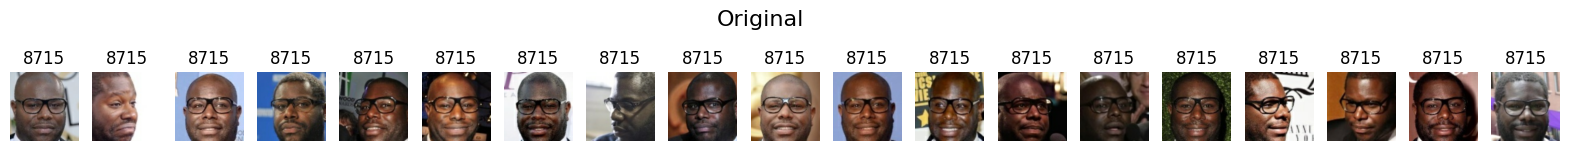

In [44]:
# Plot original images with their true labels
original_labels = np.argmax(model_for_simba.predict(class_8715), axis=1)
plot_images(class_8715, original_labels, 'Original')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.4909408].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.9373914e-05..4.0660696].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.2192235].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.064783].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.3160095].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.3261456].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.6758904].
Clipping input data to th

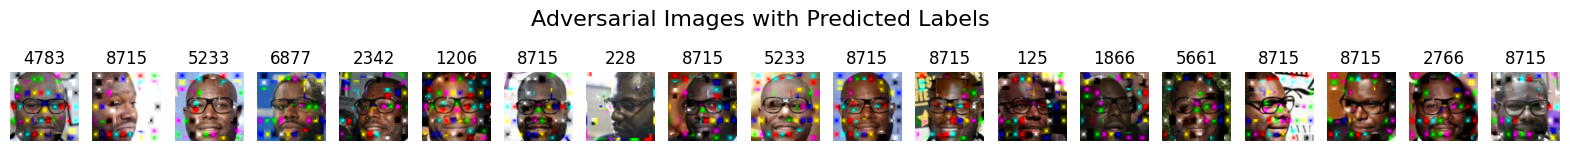

In [45]:
# Plot adversarial images with their predicted labels
adversarial_labels = np.argmax(classifier.predict(adversarial_images), axis=1)
plot_images(adversarial_images, adversarial_labels, 'Adversarial Images with Predicted Labels')

1/1 [==============================] - 0s 30ms/step


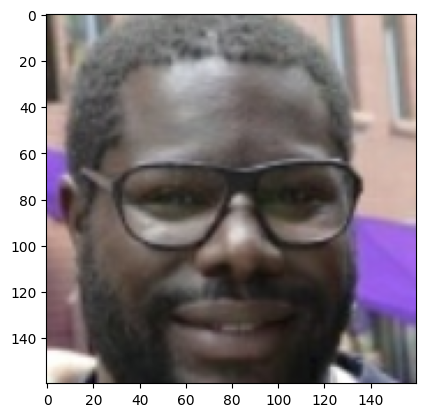

Predicted Label: 8715, Confidence: 0.9995658993721008


In [52]:
prediction_1 = model_for_simba.predict(np.expand_dims(class_8715[18], axis=0))
predicted_label_1 = np.argmax(prediction_1)
predicted_label_1
plt.imshow(class_8715[18])
plt.show()
confidence_1 = np.max(prediction_1)
print(f"Predicted Label: {predicted_label_1}, Confidence: {confidence_1}")

1/1 [==============================] - 0s 30ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.8881907].


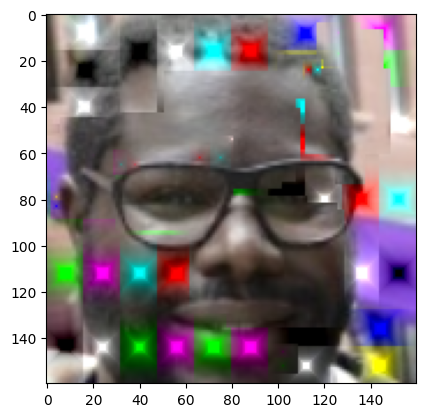

Predicted Label: 8715, Confidence: 0.4292476773262024


In [54]:
prediction_2 = model_for_simba.predict(np.expand_dims(adversarial_images[18], axis=0))
predicted_label_2 = np.argmax(prediction_2)
predicted_label_2
plt.imshow(adversarial_images[18])
plt.show()
confidence_2 = np.max(prediction_2)
print(f"Predicted Label: {predicted_label_2}, Confidence: {confidence_2}")